<a href="https://colab.research.google.com/github/robin9804/Jupyter_project/blob/master/CCR_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
from math import *


In [0]:
#parameter
n = 1.46                    #굴절율

F = np.array([[-1,0],[0,1]])

ACB = [150, -60, 60, -90]
ABC = [150, 60, -60, 30]
BAC = [-90, -60, 60, 30]
BCA = [-90, 60, -60, 150]
CBA = [30, -60, 60, 150]
CAB = [30, 60, -60, -90]

In [0]:
def input_pol(ang):
    '''
    define Ep and Es with input polarization angle
    '''
    Ex = cos(ang)
    Ey = sin(ang)
    E = np.array([[Ex],[Ey]])
    return E

#input ray의 phase는 동일하다고 가정
def rotate(ang):
    '''
    radian to rotation
    '''
    return np.array([[cos(ang),sin(ang)],[-sin(ang),cos(ang)]])

#phase shift의 angle은 투입각을 말함
def PS_s(ang):
    '''
    phase shift for P pol
    '''
    A = (n*sin(ang))**2
    y = sqrt(A-1)
    x = n*cos(ang)
    delta = atan2(y,x)
    return 2*delta

def PS_p(ang):
    '''
    phase shift for s pol
    '''
    y = n*sqrt((n*sin(ang))**2 -1)
    x = cos(ang)
    delta = atan2(y,x)
    return 2*delta

def MP(ang):
    '''
    matrix P determine by phase shift P, S
    '''
    m1 = exp(PS_s(ang)*1j)
    m2 = exp(1j*PS_p(ang))
    return np.array([[m1,0],[0,m2]])

def Mat_TR(Path,ang):
    r0 = np.dot(MP(ang),rotate(Path[0]))
    r1 = np.dot(MP(ang),rotate(Path[1]))
    r2 = np.dot(MP(ang),rotate(Path[2]))
    r3 = np.dot(F,rotate(Path[3]))
    return np.dot(np.dot(r3,r2),np.dot(r1,r0))


In [0]:
arr = np.array([[1],[2]])
print(arr[[0],[0]])

[1]


In [0]:
def read_signal(E, A_pol):
    if A_pol == 0:
        JM = np.array([[1,0],[0,0]])

    elif A_pol == 45:
        JM = np.array([[0.5,0.5],[0.5,0.5]])

    elif A_pol == 90:
        JM = np.array([[0,0],[0,1]])

    elif A_pol == 135:
        JM = np.array([[0.5,-0.5],[-0.5,0.5]])

    result = np.dot(JM,E)
    Ex = abs(result[[0],[0]])
    Ey = abs(result[[1],[0]])
    return sqrt(Ex**2 + Ey**2)

In [0]:
E = input_pol(int(input()))
read_signal(E,135)

30


0.8077161076461881

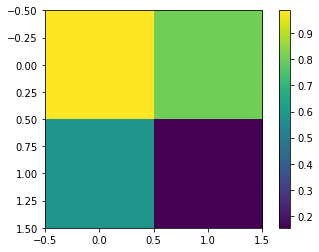

In [0]:
def polcam(ang):
  pc = np.zeros((2,2))
  init = input_pol(ang)
  pc[[0],[0]] = read_signal(init,90)
  pc[[1],[0]] = read_signal(init,45)
  pc[[0],[1]] = read_signal(init,135)
  pc[[1],[1]] = read_signal(init,0)
  return pc

test = polcam(30)

plt.imshow(test)
plt.colorbar()


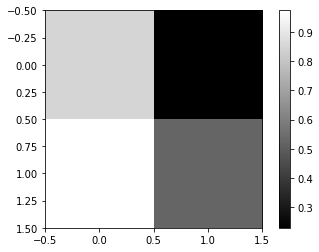

In [0]:
test = polcam(45)

plt.imshow(test,cmap='binary_r')
plt.colorbar()